In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set()

In [5]:
df = pd.read_csv('C:\Springboard Capstone Projects\Springboard_Capstone\Springboard_Capstone_Projects\Springboard_Capstone_Projects\Springboard_Capstone_Project_1\Data\\clean_data.csv')

In [6]:
df.head(3)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


# Hypothesis testing and p-values

A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference. Commonly, two statistical data sets are compared, or a data set obtained by sampling is compared against a synthetic data set from an idealized model. A hypothesis is proposed for the statistical relationship between the two data sets, and this is compared as an alternative to an idealized null hypothesis that proposes no relationship between two data sets. The comparison is deemed statistically significant if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability—the significance level. Hypothesis tests are used in determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance.

[Source](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)                                                                                                 

The p-value is the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

[Source](https://www.investopedia.com/terms/p/p-value.asp)  

**Our p-value is set in adavance i.e we before we begin our hypothesis testing. If we set a p-value of 5% (0.05), and we get a p-value less than 0.05, this would mean that this data point will not be within the 95% confidence interval. Let us try to visalize this**

![](https://drive.google.com/uc?id=1BfaS56ehqerGMD79BCUUyhPzH5CEe6_B)

**If we have a p-value greater than 0.05, then it lies in the green area. Else, it would lie in the white area (indicated by the area of the two tails "0.025", which accounts for the total probability of 5%**

**In layman terms, if we find the level of significance of our test to be less than 5% (or whatever hypothesis level we set), this would indicate a very rare event and one that didn't happen by random chance alone.**

**For our tests, let us set the level of significane to 0.05 or 5%**

#                                             2-Sample t-tests

Two-sample hypothesis testing is statistical analysis designed to test if there is a difference between two means from two different populations. The two-sample t-test is one of the most commonly used hypothesis tests to compare whether the average difference between two groups is really significant or if it is due instead to random chance.

The null hypothesis here would be that there is no significant difference between the means of the populations and any difference observed is due to random chance. The alternative hypothesis would be that there is indeed a significant difference in means between the two distributions.

[Khan Academy explanation](https://www.khanacademy.org/math/statistics-probability/significance-tests-confidence-intervals-two-samples/comparing-two-means/v/hypothesis-test-for-difference-of-means)  

# Pearson Correlation Coefficient (r)

The Pearson correlation coefficient, r, can take a range of values from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. Conversely, a negative value indicates that if one of the variables increases in value, the other decreases. The formula is displayed below:

![](https://www.onlinemath4all.com/images/xpearsoncorrelation1.png.pagespeed.ic.KtrFAHskGq.png)

Cov(x,y) represents the covariance of x and y. Sx and Sy represent the standard deviations of x and y respectively. The pearson correlation, r is a dimensionless quantity.

For more on Pearson correlation coefficient, please follow this [link](https://www.youtube.com/watch?v=Lc6nUWVdxIE) 

In [7]:
df1 = df

In [8]:
def set_loan_var_as_num(x):
    if x == 'Y':
        return 1
    else:
        return 0    

In [9]:
df1['New_Loan_Status'] = df1['Loan_Status'].apply(set_loan_var_as_num)

**Now that we have our new variable New_Loan_Status which is represented by '1' for loans approved and a '0' for loans denied, lets begin our hypothesis testing**

**H0 : There is no significant difference between males and females in terms of loan approvals.**`

**H1 : There is a significant difference between males and females in terms of loan approvals.**

In [10]:
df1_males = df1['New_Loan_Status'].loc[df1.Gender == 'Male']
df1_females = df1['New_Loan_Status'].loc[df1.Gender == 'Female']

In [9]:
t_stat, p_val = ttest_ind(df1_males, df1_females)

In [64]:
t_stat

0.4860860523233649

In [65]:
p_val

0.6270839280455408

**Our p-value of 0.627 is much greater than the set level of 0.05. Hence, we cannot reject our null hypothesis as our test doesn't indicate that gender is an influencing factor.**

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [22]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Function to calculate bootstrap replicates.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

**During our initial hypothesis, we found out that semi-urban areas had a higher loan approval rate in comparison to urban and rural areas. Let us do a significance test for the same.**

**H0: There is no significant difference between loan approvals for semi-urban and rural areas**

**H1: There is a significant difference between loan approvals for semi-urban and rural areas.**

In [11]:
df_su = df1['New_Loan_Status'].loc[df1.Property_Area == 'Semiurban']
df_rur = df1['New_Loan_Status'].loc[df1.Property_Area == 'Rural']

In [76]:
t_stat, p = ttest_ind(df_su, df_rur)

In [77]:
t_stat

3.419138850554969

In [78]:
p

0.0006911381301584281

**The small p-value above indicates that property type does matter when granting loan approvals. Hence, this wasn't due to random chance.**

In [12]:
df_urb = df1['New_Loan_Status'].loc[df1.Property_Area == 'Urban']

**Next, let us generate bootstrap replicates of the loan approvals for the different property areas and visualize their mean and distributions.**

In [26]:
df_su_reps = draw_bs_reps(df_su, np.mean, size=10000)
df_ru_reps = draw_bs_reps(df_rur, np.mean, size=10000)
df_ur_reps = draw_bs_reps(df_urb, np.mean, size=10000)

Text(0.68, 13.0, '65.89 % avg.')

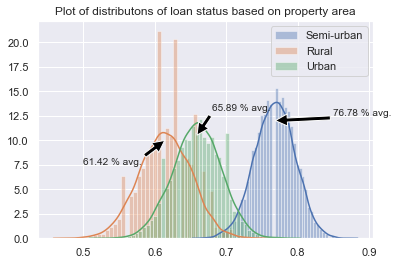

In [37]:
sns.distplot(df_su_reps)
sns.distplot(df_ru_reps)
sns.distplot(df_ur_reps)
plt.legend(('Semi-urban', 'Rural', 'Urban'))
plt.title('Plot of distributons of loan status based on property area')
plt.annotate(str(round(np.mean(df_ru_reps)*100,2)) + ' % avg.', xy=(np.mean(df_ru_reps), 10), xytext=(0.50, 7.5),arrowprops=dict(facecolor='black', shrink=0.01),
            )
plt.annotate(str(round(np.mean(df_su_reps)*100,2)) + ' % avg.', xy=(np.mean(df_su_reps), 12), xytext=(0.85, 12.5),arrowprops=dict(facecolor='black', shrink=0.01),
            )
plt.annotate(str(round(np.mean(df_ur_reps)*100,2)) + ' % avg.', xy=(np.mean(df_ur_reps), 10.5), xytext=(0.68, 13.0),arrowprops=dict(facecolor='black', shrink=0.01),
            )

**From the above plot, we see a noticeable difference in the means of loan approvals for different propert areas.**

**Next, let us try and determine if graduates have a higher loan approval rate as compared to non-graduates.**

**H0: Graduates and non-graduates have an almost equal chance of having their loan approved.**

**H1: Graduates and non-graduates do not have an equal chance of having their loan approved.**

In [15]:
df1_grad = df1['New_Loan_Status'].loc[df1.Education == 'Graduate']
df1_notgrad = df1['New_Loan_Status'].loc[df1.Education != 'Graduate']

In [28]:
t_stat, p_val = ttest_ind(df1_grad, df1_notgrad)

In [29]:
t_stat

2.132530087910069

In [30]:
p_val

0.03336067753728449

**The p-value obtained is less than our threshold of 0.05. This signifies statistical significance. It would seem that graduates have a higher approval rate.**

**Just as before, we will compute the bootstrap replicates, compute their ECDFs and then plot to visualize our results.**

In [23]:
grad_bs_reps = draw_bs_reps(df1_grad , np.mean, 10000)
ngrad_bs_reps = draw_bs_reps(df1_notgrad , np.mean, 10000)

Text(0.53, 14, '61.13 % avg.')

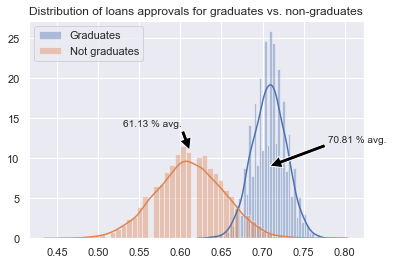

In [44]:
sns.distplot(grad_bs_reps)
sns.distplot(ngrad_bs_reps)
plt.legend(('Graduates', 'Not graduates'))
plt.title('Distribution of loans approvals for graduates vs. non-graduates')
plt.annotate(str(round(np.mean(grad_bs_reps)*100,2)) + ' % avg.', xy=(np.mean(grad_bs_reps), 9), xytext=(0.78, 12),arrowprops=dict(facecolor='black', shrink=0.01),
            )
plt.annotate(str(round(np.mean(ngrad_bs_reps)*100,2)) + ' % avg.', xy=(np.mean(ngrad_bs_reps), 11), xytext=(0.53, 14),arrowprops=dict(facecolor='black', shrink=0.01),
            )

**From the above plots, we see that graduates indeed have a higher approval rate as compared to non graduates.**

**Next, let us see if the number of dependents influence a loan approval decision.**

**H0: The number of dependents for an applicant has no significant impact on loan approval.**

**H1: The number of dependents for an applicant has a significant impact on loan approval.**

In [47]:
df1_dep_0 = df1['New_Loan_Status'].loc[df.Dependents == 0]
df1_dep_1 = df1['New_Loan_Status'].loc[df.Dependents == 1]
df1_dep_2 = df1['New_Loan_Status'].loc[df.Dependents == 2]
df1_dep_3 = df1['New_Loan_Status'].loc[df.Dependents == 3]

**Note: df.Dependents == 3 actually implies three or more dependents. The dataset originally had '3+' but we have converted that to '3' so it would be easy to categorize them for future analysis.**

**Testing for significance for applicants with 0 dependents vs 1.**

In [79]:
ttest_ind(df1_dep_0, df1_dep_1)

Ttest_indResult(statistic=0.7436564200892923, pvalue=0.45746402309730605)

**Our p-value here doesn't indicate statistical significance.**

**Next, we test for significance for applicants with 2 dependents vs 1.**

In [89]:
ttest_ind(df1_dep_1, df1_dep_2)

Ttest_indResult(statistic=-1.64076761391645, pvalue=0.10240954952989303)

**Our p-value here doesn't indicate statistical significance.**

**Next, we test for significance for applicants with 2 dependents vs 3.**

In [80]:
ttest_ind(df1_dep_2, df1_dep_3)

Ttest_indResult(statistic=1.361822475272917, pvalue=0.1752956853258321)

**Again, our p-value here doesn't indicate statistical significance.**

**Next, we test for significance for applicants with 2 dependents vs 0.**

In [81]:
ttest_ind(df1_dep_2, df1_dep_0)

Ttest_indResult(statistic=1.2864486378308215, pvalue=0.19893501529838317)

**Again, our p-value here doesn't indicate statistical significance.**

**Next, we test for significance for applicants with 3 dependents vs 0.**

In [83]:
ttest_ind(df1_dep_0, df1_dep_3)

Ttest_indResult(statistic=0.5589791837896266, pvalue=0.5764818512984863)

**Once again, our p-value here doesn't indicate statistical significance.**

**Now, let us test to see if there is a significant difference for those who are self employed vs. those who aren't.**

**H0 : The loan approval decision isn't affected by the employees's work status - self employed or nor self employed.**

**H1 : The loan approval decision is affected by the employees's work status - self employed or nor self employed.**

In [50]:
df1_self = df1['New_Loan_Status'].loc[df.Self_Employed == 'Yes']
df1_notself = df1['New_Loan_Status'].loc[df.Self_Employed != 'Yes']

In [29]:
ttest_ind(df1_self, df1_notself)

Ttest_indResult(statistic=-0.09154440013117748, pvalue=0.9270899835543112)

In [51]:
df1_self_bs_reps = draw_bs_reps(df1_self, np.mean, 10000)
df1_notself_bs_reps = draw_bs_reps(df1_notself, np.mean, 10000)

Text(0.5, 1.0, 'Distribution of the means of loan approvals of self employed vs. non self employed appliants')

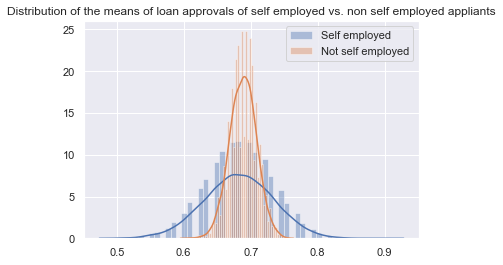

In [55]:
sns.distplot(df1_self_bs_reps)
sns.distplot(df1_notself_bs_reps)
plt.legend(('Self employed', 'Not self employed'), loc = 'upper right')
plt.title('Distribution of the means of loan approvals of self employed vs. non self employed appliants')

**From the above plot, we see no significant difference in the mean when it comes to loan appprovals for self employed vs. not self employed applicants.**

**Next, we'll try to see if there really is a significant difference in loan approvals for people with credit vs. no credit.**

**H0: There is no significant difference in loan approvals for people with credit history vs. those with no credit history.**

**H0: There is a significant difference in loan approvals for people with credit history vs. those with no credit history.**

In [57]:
df_cred = df['New_Loan_Status'].loc[df.Credit_History == 1.0]
df_no_cred = df['New_Loan_Status'].loc[df.Credit_History != 1.0]

In [57]:
t_stat, p_val = ttest_ind(df_cred, df_no_cred)

In [58]:
t_stat

11.870669715478499

In [59]:
p_val

2.1445069283823224e-29

**Our extremely small p-vaue shows that there is indeed a significant difference in loan approvals for people with no_credit history vs. those with credit history.**

**Next, we plot the ECDFs of these distributions.**

In [58]:
cred_bs_reps = draw_bs_reps(df_cred, np.mean, 10000)
ncred_bs_reps = draw_bs_reps(df_no_cred, np.mean, 10000)

Text(0.5, 1.0, 'Distribution of loan approvals for those with credit history vs. those without credit history')

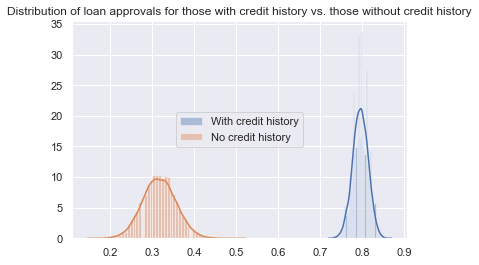

In [63]:
sns.distplot(cred_bs_reps)
sns.distplot(ncred_bs_reps)
plt.legend(('With credit history', 'No credit history'), loc = 'center')
plt.title('Distribution of loan approvals for those with credit history vs. those without credit history')

**We see quite a massive difference above. Chances of a loan approval for applicants with credit history are significantly higher than those with no credit history.**

**Next, let us try to find out the correlation between some of the independent variables.**

In [94]:
from scipy import stats

**From an intuitive sense, it would make sense for an applicant's income be somewhat proportional to the Loan amount requested. Let's see if this is the case.**

In [98]:
pearson_r, p_val = stats.pearsonr(df1['ApplicantIncome'], df1['LoanAmount'])

In [99]:
pearson_r

0.5656204566820271

**Our pearson correlation coefficient of 0.56 indicates a positive relation between the 2 variables.**

In [102]:
p_val

2.779254792343974e-06

**The p-value above indicates that there is indeed a relation. Let us plot the linear regression plot to visualize this relationsip.**

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression plot of Loan Amount by Applicant income')

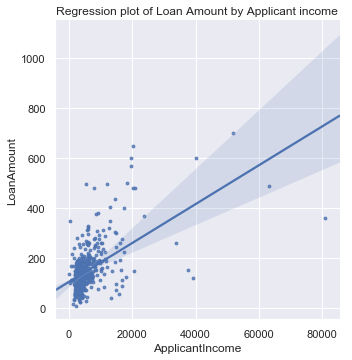

In [25]:
sns.lmplot(x = 'ApplicantIncome', y ='LoanAmount', data = df1, scatter_kws={"s": 8})
plt.title('Regression plot of Loan Amount by Applicant income')

**Next, let us observe the correlation between the Coapplicant income and the Loan Amount.**

In [100]:
pearson_r, p_val = stats.pearsonr(df1['CoapplicantIncome'], df1['LoanAmount'])

In [101]:
pearson_r

0.18782839323334405

**Whiile there is a positive correlation, it isn't a very strong one. However, the level of significance computed suggests statistical significance.

In [103]:
p_val

2.779254792343974e-06

**From the plot below, we see quite a few outliers and some data points to far away from the fittedlinear regression line suggesting the not-so-strong correlation.**

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Regression plot of Loan Amount by CoapplicantIncome')

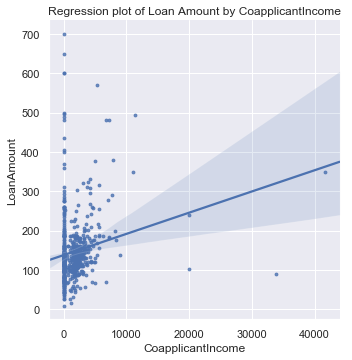

In [26]:
sns.lmplot(x = 'CoapplicantIncome', y ='LoanAmount', data = df1, scatter_kws={"s": 8})
plt.title('Regression plot of Loan Amount by CoapplicantIncome')

**Let us now see what we can make of the relation between the Loan Amount requested and the loan amount term.**

In [106]:
pearson_r, p_val = stats.pearsonr(df1['Loan_Amount_Term'], df1['LoanAmount'])

In [107]:
pearson_r

0.03647487204122825

**We observe a weak correlation that's almost 0. The computed p-value doesn't sugest statistical significance either.**

In [108]:
p_val

0.36691333573267026